<a href="https://colab.research.google.com/github/Accenture-1a-BTT/accenture-1a-team-project/blob/test-koshish/FakeNews_Accenture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
%matplotlib inline
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy
from collections import Counter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# Exploratory Data Analysis Data Cleaning

## Single Dataset Inspection and Cleaning

Load Data Sets and Save it as a Pandas DataFrame

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
folder_path = '/content/drive/My Drive/Break Through Tech/AI Studio/Google Colab/Data Set/'
true_file = os.path.join(folder_path, 'True.csv')
fake_file = os.path.join(folder_path, 'Fake.csv')
true_df = pd.read_csv(true_file,header=0)
fake_df = pd.read_csv(fake_file,header=0)

Basic Inspection

In [4]:
# Check the data set size
print("True news data set size: ", true_df.size)
print("Fake news data set size: ", fake_df.size)

True news data set size:  85668
Fake news data set size:  93924


In [5]:
# Check Columns of Data Set
print("Columns of true news data set: ", list(true_df.columns))
print("Columns of fake news data set: ", list(fake_df.columns))

Columns of true news data set:  ['title', 'text', 'subject', 'date']
Columns of fake news data set:  ['title', 'text', 'subject', 'date']


In [6]:
# Check Data Types
print("Data types of true news data set: ")
print(true_df.dtypes)
print("Data types of fake news data set: ")
print(fake_df.dtypes)

Data types of true news data set: 
title      object
text       object
subject    object
date       object
dtype: object
Data types of fake news data set: 
title      object
text       object
subject    object
date       object
dtype: object


In [7]:
print("First 10 rows of True News DataFrame: ")
true_df.head(10)

First 10 rows of True News DataFrame: 


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [8]:
print("First 10 rows of Fake News DataFrame: ")
fake_df.head(10)

First 10 rows of Fake News DataFrame: 


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


Check missing values in each dataset

In [9]:
print("Null value on each data set: ")
print("True news file:\n", true_df.isnull().sum())
print("Fake news file:\n", fake_df.isnull().sum())
# Siying Comment:
# We know from the inspection that there is no null value on the data set so we don't need to worry about the null value.

print("\nEmpty strings check:")
print("True news empty text:", (true_df['text'].str.strip() == '').sum())
print("Fake news empty text:", (fake_df['text'].str.strip() == '').sum())
# Siying Comment:
# However, there is no null value in the dataset does not means there is no empty string on the data set.
# And here we did find some rows with empty string in the 'text' feature.
# My suggestion is we can simply delete the rows with empty string since it will not provide any useful information for the model.

print("\nVery short text:")
print("True news < 10 chars:", (true_df['text'].str.len() < 10).sum())
print("Fake news < 10 chars:", (fake_df['text'].str.len() < 10).sum())
# Siying Comment:
# Also, I found some data set with very short string length, I'm quite worried about if it will provide us sufficient information to train the model.
# Since Chinyere will be focus on punctuation and sentence length, I think I will leave this question to her that how should we handle this, keep them or drop them.
# # For now, I will remove texts with less than 10 characters since they cannot provide meaningful features for us

# Siying Summary:
# Fake news dataset has 630 empty strings and 651 very short texts. These numbers are very close, which indicates that the most of short texts are actually empty strings.
# Also, notice the disparity in terms of empty strings and short texts:
# - True news: 1 empty string, 1 very short text
#             (can indicates that the very short text is the empty string, which means that true news does not has short text problems)
# - Fake news: 630 empty string, 651 very short text, which means 21 very short texts
# It indicates an important differences between real and fake news sources, which could be a distinguishing feature that we can pay attention to.

Null value on each data set: 
True news file:
 title      0
text       0
subject    0
date       0
dtype: int64
Fake news file:
 title      0
text       0
subject    0
date       0
dtype: int64

Empty strings check:
True news empty text: 1
Fake news empty text: 630

Very short text:
True news < 10 chars: 1
Fake news < 10 chars: 651


Remove empty string and very short text from each dataset

In [10]:
# Remove empty string and very short text from true news data set
true_nonempty_df = true_df[(true_df['text'].str.strip() != '') & (true_df['text'].str.len() >= 10)].copy()
# Remove empty string and very short text from fake news data set
fake_nonempty_df = fake_df[(fake_df['text'].str.strip() != '') & (fake_df['text'].str.len() >= 10)].copy()

print("After removing empty string and very short text")
print(f"Ture news size: {len(true_nonempty_df)}(removed {len(true_df) - len(true_nonempty_df)} rows)")
print(f"Fake news size: {len(fake_nonempty_df)}(removed {len(fake_df) - len(fake_nonempty_df)} rows)")

After removing empty string and very short text
Ture news size: 21416(removed 1 rows)
Fake news size: 22830(removed 651 rows)


Check for completely duplicate rows in each dataset

In [11]:
# Check for completely duplicate articles (which means includes title, text, subject, and date)
print("True Dataframe -- Number of duplicate rows:")
print(true_nonempty_df.duplicated().sum())
print("Fake Dataframe -- Number of duplicate rows:")
print(fake_nonempty_df.duplicated().sum())

# Siying Comment:
# Found 206 duplicate rows in real news and 3 in fake news datasets. These are completely identical articles (same title, text, subject, and date).
# Duplicate rows can lead to:
# 1. overfitting,
# 2. give undue weight to our model
# 3. bias on our feature analysis
# 4. more conputational cost
# Thus, I suggest that we should remove the duplicate rows to ensure our data is clean and unbiasd.

True Dataframe -- Number of duplicate rows:
206
Fake Dataframe -- Number of duplicate rows:
3


Remove completely duplicate rows from each dataset

In [12]:
# Remove completely duplicate articles
true_no_duplicates_df = true_nonempty_df.drop_duplicates().copy()
print(f"Remove {len(true_nonempty_df) - len(true_no_duplicates_df)} dulplicate rows")
fake_no_duplicates_df = fake_nonempty_df.drop_duplicates().copy()
print(f"Remove {len(fake_nonempty_df) - len(fake_no_duplicates_df)} dulplicate rows")

Remove 206 dulplicate rows
Remove 3 dulplicate rows


## Merge and cross-check

Add labels to each cleaned dataset

In [13]:
# Add labels before merging
true_no_duplicates_df['label'] = 'TRUE'
fake_no_duplicates_df['label'] = 'FAKE'

Merge datasets into combined dataframe

In [14]:
# Merge the cleaned data sets
merged_df = pd.concat([true_no_duplicates_df, fake_no_duplicates_df], ignore_index=True)

Merged Data Set Inspection

In [15]:
# Check Merged Data Sets
print("Combined dataset shape:", merged_df.shape)
print("Label counts:")
print(merged_df['label'].value_counts())

print("\nMerge Data Set Preview: ")
merged_df.head(10)

Combined dataset shape: (44037, 5)
Label counts:
label
FAKE    22827
TRUE    21210
Name: count, dtype: int64

Merge Data Set Preview: 


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",TRUE
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",TRUE
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",TRUE
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",TRUE
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",TRUE
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",TRUE


Check for conflicting labels (same text, different labels)

In [16]:
# Check if same text has conflict labels
# Groups all rows that have identical text content together, for each group, look at the 'label' column, count how many unique labels exist in each group
text_label_counts = merged_df.groupby('text')['label'].nunique()
# Only look at the groups that has more than 1 label
conflicting_texts = text_label_counts[text_label_counts > 1]

# If any conflict label found:
if len(conflicting_texts) > 0:
  for i, text in enumerate(conflicting_texts.index):
    print(f"\n--- CONFLICT {i+1} ---")
    conflicting_rows = merged_df[merged_df['text'] == text]

    print("Label counts for this article: ")
    print(conflicting_rows['label'].value_counts())

    print(f"Text: {text}")
else:
  print("No conflict labels found!")

# Siying Comment:
# Found no conflicting labels, which means there are no articles with the same text but got different label. It's nice that we don't need to worry about it.

No conflict labels found!


Check for duplicate text content (same text)

In [17]:
print("Number of articles with duplicate text content in data frame:")
print(merged_df['text'].duplicated().sum())

# Siying Comment:
# Found 5402 duplicated text on the data frame.
# These are identical text but with different title, text, subject, and date. They might be the articles that reposted by other media.
# Since keep these duplicated text might also cause bias and overfitting, Thus, I suggest remove these rows with duplicated text as well.

Number of articles with duplicate text content in data frame:
5402


Remove duplicate text content

In [46]:
#THE FINAL DF IS CALLED merged_no_duplicates
merged_no_duplicates_df = merged_df.drop_duplicates(subset=['text'], keep='first').copy()
print(f"Remove {len(merged_df) - len(merged_no_duplicates_df)} dulplicate rows")
print("Clean data overview: ")
print(f"Total articles: {len(merged_no_duplicates_df)}")

Remove 5402 dulplicate rows
Clean data overview: 
Total articles: 38635



**Check for Reuters Tag and Location Header in the Data Set.**




In [47]:

# Add a boolean column for if 'Reuters' appears in the text (case-insensitive)
merged_no_duplicates_df['contains_reuters'] = merged_no_duplicates_df['text'].str.contains('reuters', case=False, na=False)

# Count and percentage by label
print("Number of articles containing 'Reuters':")
print(merged_no_duplicates_df.groupby('label')['contains_reuters'].sum())

print("\nPercentage with 'Reuters' in each label:")
print(merged_no_duplicates_df.groupby('label')['contains_reuters'].mean())

print("\nSample TRUE news with 'Reuters':")
print(merged_no_duplicates_df[(merged_no_duplicates_df['label'] == 'TRUE') & (merged_no_duplicates_df['contains_reuters'])].head(3)['text'].values)


Number of articles containing 'Reuters':
label
FAKE      220
TRUE    21154
Name: contains_reuters, dtype: int64

Percentage with 'Reuters' in each label:
label
FAKE    0.012612
TRUE    0.998254
Name: contains_reuters, dtype: float64

Sample TRUE news with 'Reuters':
['WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in wh

Nearly all of our TRUE news articles (99.8)% contain the word "Reuters" and 1.3% of Fake articles do. In other words, we could easily cheat just by picking anything with word "Reuters" as True News which makes it unfair and the
model is not really detecting the fake news but instead looking at the source. Thus, we have decided to remove the Reuters word tag.

In [48]:
merged_no_duplicates_df['text'] = merged_no_duplicates_df['text'].str.replace('reuters', '', case=False, regex=True)
merged_no_duplicates_df['text'] = merged_no_duplicates_df['text'].str.replace(r'\(\s*\)', '', regex=True)

merged_no_duplicates_df['contains_reuters'] = merged_no_duplicates_df['text'].str.contains('reuters', case=False, na=False)
print("Articles with 'Reuters' after removal:")
print(merged_no_duplicates_df['contains_reuters'].sum())

Articles with 'Reuters' after removal:
0


In [49]:
# Sample TRUE news after removing 'Reuters'
print("Sample TRUE news after 'Reuters' removal:")
print(merged_no_duplicates_df[merged_no_duplicates_df['label'] == 'TRUE']['text'].head(10).values)

# Sample FAKE news
print("\nSample FAKE news:")
print(merged_no_duplicates_df[merged_no_duplicates_df['label'] == 'FAKE']['text'].head(10).values)

Sample TRUE news after 'Reuters' removal:
['WASHINGTON  - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spendi

Checking for Location Headers in the Data Set

In [50]:
location_pattern = re.compile(r'^[A-Z][A-Z\s,\/\.]*\s-\s')

def has_location_header(text):
    if pd.isnull(text):
        return False
    return bool(location_pattern.match(text.strip()))

# Add column to mark 'has_location_header'
merged_no_duplicates_df['has_location_header'] = merged_no_duplicates_df['text'].apply(has_location_header)

# Check proportion in each class
print("Proportion of articles starting with a location header:")
print(merged_no_duplicates_df.groupby('label')['has_location_header'].mean())

# Count total in each class
print("\nCount of articles starting with a location header:")
print(merged_no_duplicates_df.groupby('label')['has_location_header'].sum())


Proportion of articles starting with a location header:
label
FAKE    0.000000
TRUE    0.846586
Name: has_location_header, dtype: float64

Count of articles starting with a location header:
label
FAKE        0
TRUE    17940
Name: has_location_header, dtype: int64


Again, we have seen that the location header also creates a shortcut to identify the TRUE News as we see from the percentage that Fake news do not contain any location header. If we feed this information our model will rely on this particular location format than to genuinely learn how to detect the fake news. So we have decided to strip the location header.

In [75]:
def clean_location_header_with_audit(text):
    if not isinstance(text, str):
        return text, None

    m = re.match(r'^(.{3,100}?)\s*-\s+', text)
    if not m:
        return text, None

    header = m.group(1).strip()
    letters = [c for c in header if c.isalpha()]
    letters_str = ''.join(letters)

    # CASE A: All letters uppercase
    if letters and letters_str.isupper():
        return text[m.end():].lstrip(), header

    # CASE B: ALLCAPS city, TitleCase country/state
    if re.match(r'^[A-Z0-9\s\.\'()\/-]+,\s+[A-Z][a-z]+(?:\s+[A-Z][a-z]+)*$', header):
        return text[m.end():].lstrip(), header

    # CASE C: TitleCase city, ALLCAPS country/state
    if (re.match(r'^[A-Z][a-z]+(?:\s+[A-Z][a-z]+)*,\s+[A-Z0-9\s\.\'()\/-]+$', header)
        and re.search(r',[^,]*[A-Z]{2,}', header)):
        return text[m.end():].lstrip(), header

    # CASE D: Abbreviations
    if re.match(r'^[A-Z]{2,5},\s*[A-Z\.]{2,6}$', header.replace(' ', '')):
        return text[m.end():].lstrip(), header

    # CASE E: City, State/Country (like McAllen, Texas or Orlando, Fla.)
    if re.match(
        r'^[A-Z][a-z]+(?:\s+[A-Z][a-z]+)*,\s+[A-Z][a-z]+(?:\.[A-Za-z]*)?(?:\s+[A-Z][a-z]+)*$',
        header
    ):
        return text[m.end():].lstrip(), header

    # DEFAULT
    return text, None


results = merged_no_duplicates_df['text'].apply(clean_location_header_with_audit)
merged_no_duplicates_df['text'] = results.apply(lambda x: x[0])
merged_no_duplicates_df['removed_header'] = results.apply(lambda x: x[1])

# check if any are left
remaining_headers = merged_no_duplicates_df['text'].str.match(r'^[A-Z][A-Za-z\s\.,/()-]{2,30}-\s')
print("Articles with location header left:", remaining_headers.sum())

num_loc_headers = remaining_headers.sum()
total_articles = len(merged_no_duplicates_df)
percentage = (num_loc_headers / total_articles) * 100
print(f"Percentage of articles with location headers: {percentage:.2f}%")


Articles with location header left: 12
Percentage of articles with location headers: 0.03%


In [76]:
remaining_headers_mask = merged_no_duplicates_df['text'].str.match(
    r'^[A-Z][A-Za-z\s\.,/()-]{2,30}-\s'
)
remaining_articles = merged_no_duplicates_df[remaining_headers_mask]

print(remaining_articles['text'].head(30).values)


['McAllen, Texas  - Standing on the bluffs of Roma, Texas on a May afternoon two border patrol agents look out over the meandering Rio Grande River that separates Mexico from the United States and recall a time when the scene was far less tranquil.  \xa0\xa0\xa0\xa0Last fall, during the waning months of the Obama administration, hundreds of immigrants crossed the river on rafts at this point each day, many willingly handing themselves over to immigration authorities in hopes of being released into the United States to await court proceedings that would decide their fate.  \xa0\xa0\xa0Now, the agents look out on an empty landscape. Foot paths up from the water have started to disappear under growing brush, with only the stray baby shoe or toothbrush serving as reminders of that migrant flood. \xa0\xa0\xa0 The reason for the change, the agents say, is a perception in Mexico and Central America that President Donald Trump has ended the practice known as “catch-and-release,” in which immig

Koshish - I will remove these specific city manually

In [87]:
manual_headers = [
    "San Diego", "Washington", "McAllen, Texas", "NEW YORK", "NEW YORK", "Kuala Lumpur",
    "Ankara", "Juba", "Aden", "LONDON", "NUSA DUA, Indonesia,", "Seoul", "Buenos Aires",
    "Deir al Zor, SYRIA", "Sydney", "Berlin", "Fort Lauderdale","Fort Lauderdale and New York", "Beijing", "Melbourne",
    "Orlando", "Orlando, Fla.", "McAllen, Texas", "Washington, D.C."
]

def remove_manual_headers(text):
    for h in manual_headers:
        pattern = re.compile(r'^' + re.escape(h) + r'(?:\s*\([^\)]*\))?\s*-\s*')
        text = pattern.sub('', text, count=1).lstrip()  # remove header and dash
    return text


merged_no_duplicates_df['text'] = merged_no_duplicates_df['text'].apply(remove_manual_headers)

remaining_headers_mask = merged_no_duplicates_df['text'].str.match(
    r'^[A-Z][A-Za-z\s\.,/()-]{2,30}-\s'
)
remaining_articles = merged_no_duplicates_df[remaining_headers_mask]

print("Articles with location header left:", remaining_headers_mask.sum())
print("Percentage:", (remaining_headers_mask.sum() / len(merged_no_duplicates_df)) * 100)
print("Remaining headers sample:", remaining_articles['text'].head(50).values)

Articles with location header left: 2
Percentage: 0.005176653293645658
Remaining headers sample: ['Senator Chuck Schumer ( D- NY) is furious with Ted Cruz, and with good reason. Like many Republicans, Cruz has helped circle the wagons in the wake of the death of Supreme Court Justice Antonin Scalia, and has promised to block anyone President Obama might appoint. Of course, all of those extremist windbags on the right want another far-right nut like Antonin Scalia on the Court   but there s a catch. President Obama has every right to nominate a person of his choosing, which will ensure a Supreme Court with liberal leanings. The GOP-controlled Senate, however, will do all they can to make sure that doesn t happen, though, and they have said so openly, thus leading to Sen. Schumer s fury.Appearing on This Week on Sunday morning, the Senator laid into Cruz s plans: Well, the job, first and foremost, is for the president to nominate and for the Senate to hold hearings and go through the pro

In [88]:
print("Sample TRUE news after improved location header removal:")
print(merged_no_duplicates_df[merged_no_duplicates_df['label'] == 'TRUE']['text'].head(10).values)

print("\nSample FAKE news:")
print(merged_no_duplicates_df[merged_no_duplicates_df['label'] == 'FAKE']['text'].head(10).values)

Sample TRUE news after improved location header removal:
['The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spend

In [93]:
df_true = merged_no_duplicates_df[merged_no_duplicates_df['label'] == 'TRUE']
df_fake = merged_no_duplicates_df[merged_no_duplicates_df['label'] == 'FAKE']

#Note: This is only for download purpose, you are free to use this dataset as I have cleaned them.

df_true.to_csv('final_cleaned_true.csv', index=False)
df_fake.to_csv('final_cleaned_fake.csv', index=False)


Class Imbalance Visualization

Class counts:
label
TRUE    21191
FAKE    17444
Name: count, dtype: int64

Class percentage:
label
TRUE    54.84923
FAKE    45.15077
Name: proportion, dtype: float64


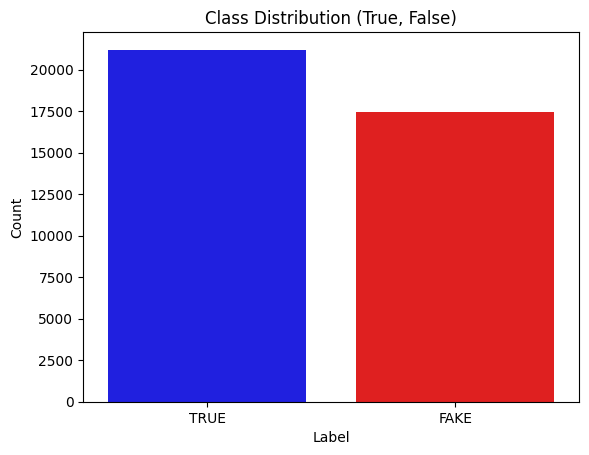

In [89]:
print("Class counts:")
print(merged_no_duplicates_df['label'].value_counts())

print("\nClass percentage:")
print(merged_no_duplicates_df['label'].value_counts(normalize=True) * 100)

sns.countplot(x='label', hue='label', data=merged_no_duplicates_df, legend= False, palette={'TRUE':"blue",'FAKE':"red"})
plt.title("Class Distribution (True, False)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()
#Xio: Even after removal of duplicates there is no major class imbalance in the data set that has to be fixed

### Try checking for duplicates in fake vs true dataset separately to avoid deduplicating across (i.e. don't remove rows that are similar if one belongs to the true dataset and the other belongs to the fake dataset)

### Separate Fake and True DataFrames

In [91]:
#separate the cleaned DataFrame into fake and true based on the 'label' column
df_fake = df_cleaned[df_cleaned['label'] == 0].copy()
df_true = df_cleaned[df_cleaned['label'] == 1].copy()

print("Shape of fake DataFrame:", df_fake.shape)
print("Shape of true DataFrame:", df_true.shape)

NameError: name 'df_cleaned' is not defined

### Identify Near Duplicates within Fake Data

In [ ]:
from sklearn.neighbors import NearestNeighbors

#use NearestNeighbors to find similar documents for each document based on their TF-IDF vectors...
#...from the original combined dataframe, but filtered for fake news

#find the top 5 nearest neighbors for each document
n_neighbors = 5
nn_fake = NearestNeighbors(n_neighbors=n_neighbors, algorithm='auto', metric='cosine')

#fit on the TF-IDF matrix for titles of fake news
#we need to re-vectorize or ensure the indices align with the original tfidf_matrix_title...
#...safer approach is to re-vectorize the subsets
tfidf_vectorizer_title_fake = TfidfVectorizer(stop_words='english')
tfidf_matrix_title_fake = tfidf_vectorizer_title_fake.fit_transform(df_fake['title_cleaned'])

nn_fake.fit(tfidf_matrix_title_fake)

#find the nearest neighbors and their distances for fake news titles
distances_title_fake, indices_title_fake = nn_fake.kneighbors(tfidf_matrix_title_fake)

#fit on the TF-IDF matrix for text of fake news
tfidf_vectorizer_text_fake = TfidfVectorizer(stop_words='english')
tfidf_matrix_text_fake = tfidf_vectorizer_text_fake.fit_transform(df_fake['text_cleaned'])

nn_fake.fit(tfidf_matrix_text_fake)

#find the nearest neighbors and their distances for fake news text
distances_text_fake, indices_text_fake = nn_fake.kneighbors(tfidf_matrix_text_fake)

print("Shape of distances matrix for fake titles:", distances_title_fake.shape)
print("Shape of indices matrix for fake titles:", indices_title_fake.shape)
print("Shape of distances matrix for fake text:", distances_text_fake.shape)
print("Shape of indices matrix for fake text:", indices_text_fake.shape)

In [ ]:
#identify potential near duplicates in the fake dataset
near_duplicates_fake = set()
distance_threshold = 0.05 #can adjust this threshold

#check for near duplicates based on title similarity within fake data
for i in range(len(df_fake)):
    for j in range(1, n_neighbors):
        if distances_title_fake[i, j] < distance_threshold:
            pair = tuple(sorted((i, indices_title_fake[i, j])))
            if pair[0] != pair[1]:
                near_duplicates_fake.add(pair)

#check for near duplicates based on text similarity within fake data
for i in range(len(df_fake)):
    for j in range(1, n_neighbors):
        if distances_text_fake[i, j] < distance_threshold:
            pair = tuple(sorted((i, indices_text_fake[i, j])))
            if pair[0] != pair[1]:
                near_duplicates_fake.add(pair)

print(f"Number of potential near-duplicate pairs found within fake data: {len(near_duplicates_fake)}")

#view some of the identified near duplicates in the fake data
print("\nExample near-duplicate pairs within fake data:")
for pair in list(near_duplicates_fake)[:5]:
   print(f"Pair of indices (within fake_df): {pair}")
   display(df_fake.iloc[list(pair)][['title', 'text']])

### Identify Near Duplicates within True Data

In [ ]:
#use NearestNeighbors to find similar documents for each document based on their TF-IDF vectors...
#...from the original combined dataframe, but filtered for true news

#find the top 5 nearest neighbors for each document
n_neighbors = 5
nn_true = NearestNeighbors(n_neighbors=n_neighbors, algorithm='auto', metric='cosine')

#fit on the TF-IDF matrix for titles of true news
#re-vectorize the true subset
tfidf_vectorizer_title_true = TfidfVectorizer(stop_words='english')
tfidf_matrix_title_true = tfidf_vectorizer_title_true.fit_transform(df_true['title_cleaned'])

nn_true.fit(tfidf_matrix_title_true)

#find the nearest neighbors and their distances for true news titles
distances_title_true, indices_title_true = nn_true.kneighbors(tfidf_matrix_title_true)

#fit on the TF-IDF matrix for text of true news
tfidf_vectorizer_text_true = TfidfVectorizer(stop_words='english')
tfidf_matrix_text_true = tfidf_vectorizer_text_true.fit_transform(df_true['text_cleaned'])

nn_true.fit(tfidf_matrix_text_true)

#find the nearest neighbors and their distances for true news text
distances_text_true, indices_text_true = nn_true.kneighbors(tfidf_matrix_text_true)

print("Shape of distances matrix for true titles:", distances_title_true.shape)
print("Shape of indices matrix for true titles:", indices_title_true.shape)
print("Shape of distances matrix for true text:", distances_text_true.shape)
print("Shape of indices matrix for true text:", indices_text_true.shape)

In [ ]:
#identify potential near duplicates in the true dataset
near_duplicates_true = set()
distance_threshold = 0.05 #try different thresholds and see the outcome. -- can adjust this threshold

#check for near duplicates based on title similarity within true data
for i in range(len(df_true)):
    for j in range(1, n_neighbors):
        if distances_title_true[i, j] < distance_threshold:
            pair = tuple(sorted((i, indices_title_true[i, j])))
            if pair[0] != pair[1]:
                near_duplicates_true.add(pair)

#check for near duplicates based on text similarity within true data
for i in range(len(df_true)):
    for j in range(1, n_neighbors):
        if distances_text_true[i, j] < distance_threshold:
            pair = tuple(sorted((i, indices_text_true[i, j])))
            if pair[0] != pair[1]:
                near_duplicates_true.add(pair)

print(f"Number of potential near-duplicate pairs found within true data: {len(near_duplicates_true)}")

#view some of the identified near duplicates within true data
print("\nExample near-duplicate pairs within true data:")
for pair in list(near_duplicates_true)[:5]:
   print(f"Pair of indices (within true_df): {pair}")
   display(df_true.iloc[list(pair)][['title', 'text']])

### Remove Near Duplicates within Fake Data

In [ ]:
#function to identify the indices to drop from near-duplicate pairs
def get_indices_to_drop(near_duplicate_pairs):
    indices_to_drop = set()
    for pair in near_duplicate_pairs:
        #for each pair, drop the second index in the sorted tuple
        indices_to_drop.add(pair[1])
    return list(indices_to_drop)

#get the indices to drop from the fake dataframe based on near duplicates
indices_to_drop_fake = get_indices_to_drop(near_duplicates_fake)

#create a new dataframe for fake data with near duplicates removed
df_fake_cleaned = df_fake.drop(df_fake.iloc[indices_to_drop_fake].index)

print(f"Shape of fake DataFrame after removing near duplicates: {df_fake_cleaned.shape}")

### Remove Near Duplicates within True Data

In [ ]:
#identify what indices to drop from the true dataframe based on near duplicates
indices_to_drop_true = get_indices_to_drop(near_duplicates_true)

#create a new dataframe for true data with near duplicates removed
df_true_cleaned = df_true.drop(df_true.iloc[indices_to_drop_true].index)

print(f"Shape of true DataFrame after removing near duplicates: {df_true_cleaned.shape}")

### Combine Cleaned Fake and True DataFrames

In [ ]:
#combine the cleaned fake and true dataframes to get the final cleaned dataframe
df_final_cleaned = pd.concat([df_fake_cleaned, df_true_cleaned], ignore_index=True)

print(f"Shape of final cleaned DataFrame: {df_final_cleaned.shape}")
display(df_final_cleaned.head())

In [ ]:
df_final_cleaned.shape

### Feature Extraction: Linguistic Features

In [ ]:
import re
import string

#function to extract linguistic features
def extract_linguistic_features(text):
    if isinstance(text, str):
        #number of sentences
        sentences = re.split(r'[.!?]+', text)
        num_sentences = len(sentences) if sentences and sentences[0] != '' else 0

        #number of words
        words = text.split()
        num_words = len(words)

        #average sentence length (in words)
        avg_sentence_length = num_words / num_sentences if num_sentences > 0 else 0

        #number of punctuation marks
        num_punctuation = sum([1 for char in text if char in string.punctuation])

        #average word length
        avg_word_length = sum(len(word) for word in words) / num_words if num_words > 0 else 0

        return pd.Series([num_sentences, num_words, avg_sentence_length, num_punctuation, avg_word_length])
    else:
        return pd.Series([0, 0, 0, 0, 0]) # Return 0 for non-string inputs


#apply the function to extract features for 'title' and 'text'
#create new columns for title features
df_final_cleaned[['title_num_sentences', 'title_num_words', 'title_avg_sentence_length', 'title_num_punctuation', 'title_avg_word_length']] = df_final_cleaned['title'].apply(extract_linguistic_features)

#create new columns for text features
df_final_cleaned[['text_num_sentences', 'text_num_words', 'text_avg_sentence_length', 'text_num_punctuation', 'text_avg_word_length']] = df_final_cleaned['text'].apply(extract_linguistic_features)

print("DataFrame shape after adding linguistic features:", df_final_cleaned.shape)
display(df_final_cleaned.head())

### Feature Analysis: Visualizing Linguistic Features

In [ ]:
#visualize distributions of linguistic features for 'text'
features_to_visualize = ['text_num_sentences', 'text_num_words', 'text_avg_sentence_length',
                         'text_num_punctuation', 'text_avg_word_length',
                         'text_num_exclamation_points', 'text_num_question_marks', 'text_num_quotes',
                         'text_num_all_caps_words', 'text_percentage_capitalized_words', 'text_flesch_reading_ease',
                         'text_dale_chall_readability_score', 'text_avg_sentence_length_chars']

#filter features_to_visualize to only include columns present in df_final_cleaned
available_text_features = [feature for feature in features_to_visualize if feature in df_final_cleaned.columns]

plt.figure(figsize=(15, 20)) #figure height to accommodate more plots

for i, feature in enumerate(available_text_features):
    plt.subplot(5, 3, i + 1) #subplot grid 5x3
    sns.histplot(data=df_final_cleaned, x=feature, hue='label', kde=True, palette='tab10')
    plt.title(f'Distribution of {feature} by Label')
    plt.xlabel(feature)
    plt.ylabel('Number of Articles')

plt.tight_layout()
plt.show()

#visualize features for 'title'
features_to_visualize_title = ['title_num_sentences', 'title_num_words', 'title_avg_sentence_length',
                               'title_num_punctuation', 'title_avg_word_length',
                               'title_num_exclamation_points', 'title_num_question_marks', 'title_num_quotes',
                               'title_num_all_caps_words', 'title_percentage_capitalized_words', 'title_flesch_reading_ease',
                               'title_dale_chall_readability_score', 'title_avg_sentence_length_chars']

#filter features_to_visualize_title to only include columns present in df_final_cleaned
available_title_features = [feature for feature in features_to_visualize_title if feature in df_final_cleaned.columns]


plt.figure(figsize=(15, 20)) #figure height

for i, feature in enumerate(available_title_features):
    plt.subplot(5, 3, i + 1) #subplot grid 5x3
    sns.histplot(data=df_final_cleaned, x=feature, hue='label', kde=True, palette='tab10')
    plt.title(f'Distribution of {feature} by Label')
    plt.xlabel(feature)
    plt.ylabel('Number of Articles')

plt.tight_layout()
plt.show()

### Feature Analysis: Descriptive Statistics

In [ ]:
#get descriptive statistics for linguistic features grouped by label
linguistic_features = [
    'title_num_sentences', 'title_num_words', 'title_avg_sentence_length', 'title_num_punctuation', 'title_avg_word_length',
    'text_num_sentences', 'text_num_words', 'text_avg_sentence_length', 'text_num_punctuation', 'text_avg_word_length'
]

descriptive_stats = df_final_cleaned.groupby('label')[linguistic_features].describe()

print("Descriptive statistics of linguistic features by label (0: Fake, 1: True):")
display(descriptive_stats)

#NER Analysis

In [ ]:
#Loading small. Overall this cell takes 2-3min to load
nlp = spacy.load("en_core_web_sm")

#Creating a sample size of the entire dataset
df_sample = merged_no_duplicates_df.sample(2000, random_state=42)
texts = df_sample["text"].tolist()

#Using pipelines to process batches of articles faster
docs = list(nlp.pipe(texts, batch_size=100))

#Extracting the person and organizations entities
df_sample["persons"] = [[ent.text for ent in doc.ents if ent.label_=="PERSON"] for doc in docs]
df_sample["orgs"] = [[ent.text for ent in doc.ents if ent.label_=="ORG"] for doc in docs]

#Creating lists of just the person and organizations that appear in each fake and true article
fake_persons = [p for persons in df_sample[df_sample["label"]=='FAKE']["persons"] for p in persons]
true_persons = [p for persons in df_sample[df_sample["label"]=='TRUE']["persons"] for p in persons]
fake_orgs = [o for orgs in df_sample[df_sample["label"]=='FAKE']["orgs"] for o in orgs]
true_orgs = [o for orgs in df_sample[df_sample["label"]=='TRUE']["orgs"] for o in orgs]

#Getting and Counting the top entities
fake_counts = Counter(fake_persons).most_common(10)
true_counts = Counter(true_persons).most_common(10)
fake_org_counts = Counter(fake_orgs).most_common(10)
true_org_counts = Counter(true_orgs).most_common(10)

print("Fake News Top PERSONs:", fake_counts)
print("True News Top PERSONs:", true_counts)
print("Fake News Top ORGs:", fake_org_counts)
print("True News Top ORGs:", true_org_counts)

Fake News Top PERSONs: [('Trump', 1006), ('Donald Trump', 547), ('Obama', 496), ('Clinton', 284), ('Hillary Clinton', 263), ('Hillary', 205), ('doesn', 130), ('Twitter', 116), ('Donald J. Trump', 78), ('Barack Obama', 72)]
True News Top PERSONs: [('Trump', 666), ('Donald Trump', 441), ('Clinton', 337), ('Obama', 273), ('Barack Obama', 162), ('Hillary Clinton', 94), ('Twitter', 91), ('Comey', 73), ('Putin', 71), ('Tillerson', 55)]
Fake News Top ORGs: [('Trump', 1341), ('GOP', 209), ('CNN', 176), ('FBI', 173), ('Senate', 136), ('Congress', 122), ('the White House', 109), ('Fox News', 109), ('White House', 91), ('House', 87)]
True News Top ORGs: [('Reuters', 1444), ('Trump', 1233), ('Senate', 351), ('Congress', 239), ('EU', 195), ('White House', 168), ('the White House', 167), ('House', 148), ('U.N.', 113), ('State', 80)]


NER Visualization

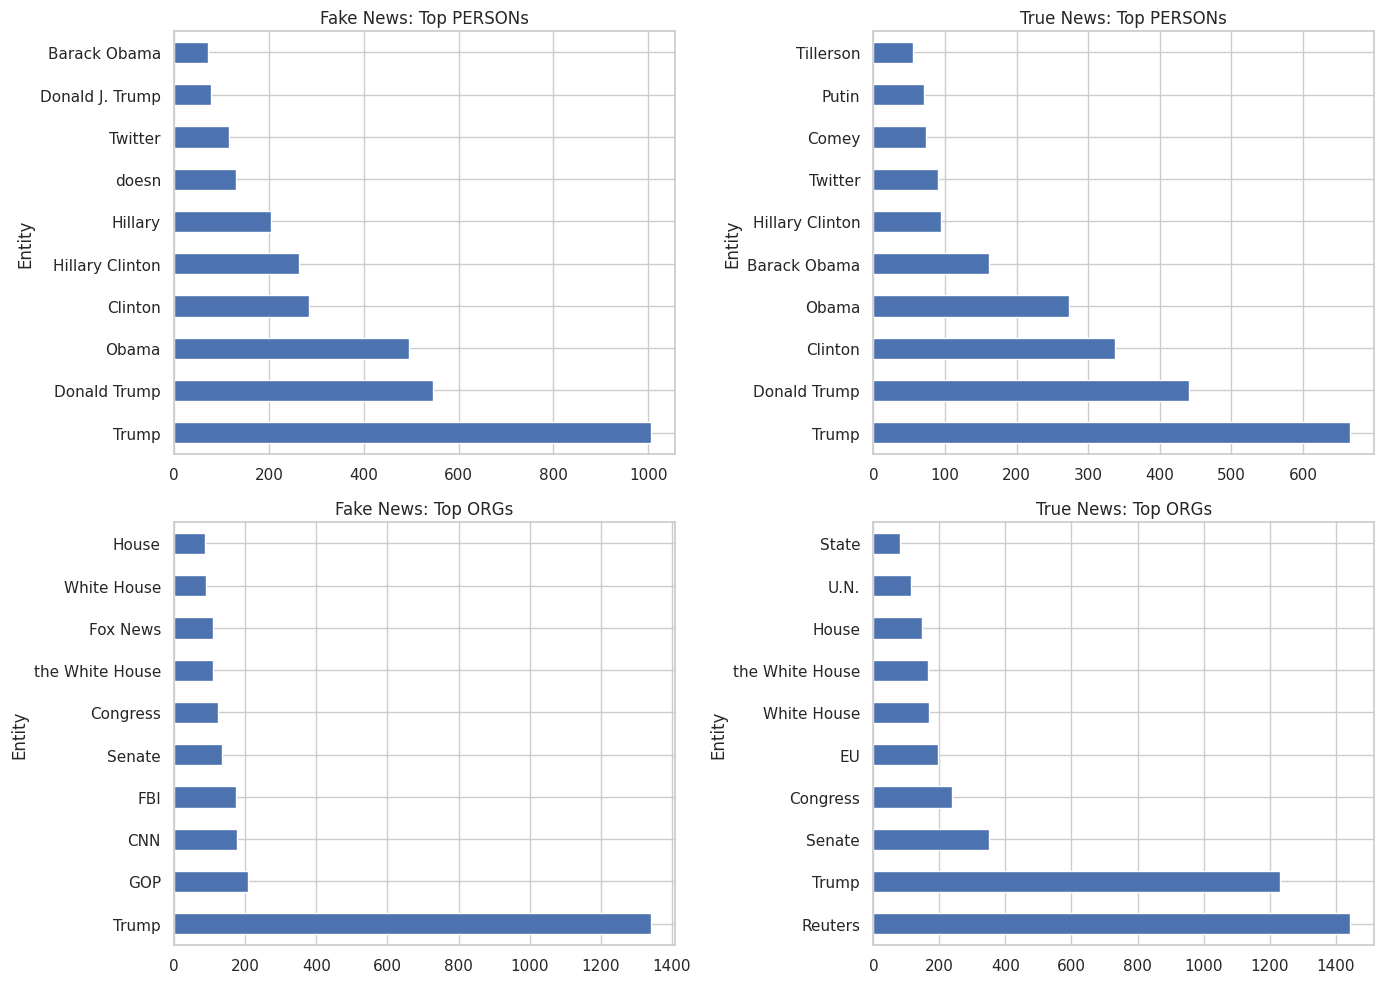

In [ ]:
#Converting from lists to DF
fake_person_df = pd.DataFrame(fake_counts, columns=["Entity", "Count"])
true_person_df = pd.DataFrame(true_counts, columns=["Entity", "Count"])
fake_org_df = pd.DataFrame(fake_org_counts, columns=["Entity", "Count"])
true_org_df = pd.DataFrame(true_org_counts, columns=["Entity", "Count"])

#Creating bar charts
fig, axes = plt.subplots(2, 2, figsize=(14,10))
fake_person_df.plot(kind="barh", x="Entity", y="Count", ax=axes[0,0], title="Fake News: Top PERSONs", legend=False)
true_person_df.plot(kind="barh", x="Entity", y="Count", ax=axes[0,1], title="True News: Top PERSONs", legend=False)
fake_org_df.plot(kind="barh", x="Entity", y="Count", ax=axes[1,0], title="Fake News: Top ORGs", legend=False)
true_org_df.plot(kind="barh", x="Entity", y="Count", ax=axes[1,1], title="True News: Top ORGs", legend=False)

plt.tight_layout()
plt.show()
#Shows that an organization feature is really important in telling the difference between fake and true as the entities and the frequency
#of this entites are different but with the people entity both fake and true articles contain similar entities and similar counts.
#Next steps: Now that article have numeric fetures on entity we can do TF-IDF and then combine that with these features to create our matrix

# Emotional Words EDA

Sentiment Analysis Setup

In [ ]:
# Install and import required libraries
!pip install textblob

import nltk
from textblob import TextBlob

# Download required NLTK data
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Create Emotional Features

In [ ]:
# The SentimentIntensityAnalyzer in NLTK is a powerful tool for performing sentiment analysis,
# specifically utilizing the VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon and rule-based sentiment analysis model.

# Initialize sentiment analyzers
sia = SentimentIntensityAnalyzer()

def analysis_emotions(text):
  vader_score = sia.polarity_scores(text)
  blob = TextBlob(text)

  return{
      'vader_compound': vader_score['compound'],            # A standardized score combining all emotions
      'vader_positive': vader_score['pos'],                 # the percentage of positive sentiment words in the text
      'vader_negative': vader_score['neg'],                 # the percentage of negative sentiment words in the text
      'vader_neutral': vader_score['neu'],                  # the percentage of neutral words in the text
      'textblob_polarity': blob.sentiment.polarity,         # shows if the text is positive, negative or neutral
      'textblob_subjectivity': blob.sentiment.subjectivity  # shows whether the text is more opinion-based or factual
  }

Apply to Data Set

In [ ]:
# Create emotional features for clean dataset
emotion_feature = []

for text in merged_no_duplicates_df['text']:
  emotion_feature.append(analysis_emotions(text))

emotion_df = pd.DataFrame(emotion_feature)
emotion_analysis_df = pd.concat([merged_no_duplicates_df.reset_index(drop=True), emotion_df],axis=1)

KeyboardInterrupt: 

Emotional Words Exploratory Analysis

In [ ]:
# # Compare emotional patterns between real and fake news
print("Emotion analysis: ")
for feature in ['vader_compound', 'vader_positive', 'vader_negative','vader_neutral', 'textblob_polarity', 'textblob_subjectivity']:
  print(f"\n{feature}: ")
  print(f"True news mean: {emotion_analysis_df[emotion_analysis_df['label'] == 'TRUE'][feature].mean():.2f}")
  print(f"Fake news mean: {emotion_analysis_df[emotion_analysis_df['label'] == 'FAKE'][feature].mean():.2f}")

#Emotion analysis:

#vader_compound:
#True news mean: 0.06
#Fake news mean: -0.09
#Siying Comment: Fake news tends to be more negative, but True news tend to be more in a positive tone.

#vader_positive:
#True news mean: 0.08
#Fake news mean: 0.09
#Siying Comment: Seems like not much disparity in terms of percentage of positive sentiment words

#vader_negative:
#True news mean: 0.08
#Fake news mean: 0.10
#Siying Comment: Slight difference in terms of percentage of negative sentiment words, seems like fake news have a higher percentage of negative sentiment words.

#vader_neutral:
#True news mean: 0.84
#Fake news mean: 0.81
#Siying Comment: Slight difference in terms of the percentage of neutral words in the text, seems like ture news have a higher percentage of neutral words.

#textbolb_polarity:
#True news mean: 0.05
#Fake news mean: 0.06
#Siying Comment: Seems like not much disparity in terms of polarity

#textbolb_subjectivity:
#True news mean: 0.36
#Fake news mean: 0.45
#Siying Comment: True news tend to be more objective, while fake news tend to be more subjective.

Emotion words correlation analysis

In [ ]:
# Label Ture News as 1, Fake news as 0
emotion_analysis_df['label_num'] = (emotion_analysis_df['label'] == 'TRUE').astype(int)

correlation = {}
emotion_feature = ['vader_compound', 'vader_positive', 'vader_negative', 'vader_neutral', 'textblob_polarity', 'textblob_subjectivity']

# Calculate the correlation of each feature
for feature in emotion_feature:
  corr = emotion_analysis_df[feature].corr(emotion_analysis_df['label_num'])
  correlation[feature] = corr
  print(f"{feature}: {corr:.2f}")

# get the list of features that has a correlation > 0.3
strong_features = {feature: corr for feature, corr in correlation.items() if abs(corr) > 0.3}
print(f"Strong correlation features(> 0.3 ): {strong_features}")

# Siying Comment:
# This emotional EDA turn out to be that instead of being more "emotional", fake news tend to be more "subjective".
# Real news tends to report facts objectively, while fake news contains more opinions and speculations.

Visual Analysis

In [ ]:
# Set up the subplot grid, creates a 2x3 (6 features in total) grid of plots
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.suptitle('Emotional Features: Real vs Fake News Comparison')

# Create individual plots
features_plot = emotion_feature
for i, feature in enumerate(features_plot):
  row = i // 3    # Set rows
  col = i % 3     # Set cols

  # Create boxplot each feature
  sns.boxplot(data=emotion_analysis_df, x ='label', y=feature, ax=axes[row,col])
  axes[row,col].set_title(f'{feature}')
  axes[row,col].set_xlabel('News Type')

plt.tight_layout()
plt.show()

# Source Attribution EDA

Source Attribution Data exploration and understanding

In [ ]:
print("====== Real News Patterns =======")
for i in range(10):
  print(f"Sample {i + 1}: ")
  print(merged_no_duplicates_df[merged_no_duplicates_df['label'] == 'TRUE']['text'].iloc[i])
  print("-" * 1000)

print("\n\n====== Fake News Patterns ======")
for i in range(10):
  print(f"Sample {i + 1}: ")
  print(merged_no_duplicates_df[merged_no_duplicates_df['label'] == 'FAKE']['text'].iloc[i])
  print("-" * 1000)

# Siying Comment:
# According to the observation to the data below, we can see a pattern of true/fake news below:
# True News:
# - Begins with a standard journalistic dateline (e.g., LOCATION (Reuters), WASHINGTON (Reuters), WEST PALM BEACH, Fla./WASHINGTON (Reuters), etc).
# - Features authoritative citations from official bodies (e.g., "The White House"(example 6)), named officials with their titles, or references to formal reports.

# Fake News:
# - Often starts narrating immediately without a location or source tag
# - Uses vague language ("it was revealed"), cites informal platforms like Twitter(example of source : 3, 4), or uses photos as sources (example of photo: 2,3,7) instead of named, official contacts or documents.

Source Attribution Features Explore

In [ ]:
# Authority Media Label Detection
authority_patterns = ['(Reuters)', '(CNN)','ABC', '(BBC)', '(FOX)','(Associated Press)' , '(AP)', 'Source link']

# Official Citation Patterns
official_source_keywords = ['according', 'statement', 'confirm', 'confirmed', 'report', 'reported', 'source', 'sources', 'document', 'documents',
                            'record', 'records', 'data', 'study', 'officials', 'spokesman', 'spokesperson']

# Social Media Citation Patterns
social_media_patterns = ['Twitter', 'tweet', 'Facebook', 'social media', '@', 'pic.twitter.com']

Source Attribution Feature Extraction

In [ ]:
import re

def extract_source_attribution_features(text):
  text_lower = text.lower()

  # Authority Media Label Detection
  authority_count = sum(1 for pattern in authority_patterns if pattern in text_lower)

  # Official Citation Patterns
  official_count = 0
  for keyword in official_source_keywords:
    # Using \b ensures that we perform a whole-word match, rather than a partial match.
    official_count += len(re.findall(r'\b' + keyword + r'\b', text_lower))

  # Social Media Citation Patterns
  social_count = sum(1 for pattern in social_media_patterns if pattern in text)

  word_count = len(text.split())

  return {
      'Authority media label count': authority_count,
      'Official source keywords count': official_count,
      'Social media citation count': social_count,
      'Authority media label ratio': authority_count / word_count if word_count > 0 else 0,
      'Official source keywords ratio': official_count / word_count if word_count > 0 else 0,
      'Social media citation ratio': social_count / word_count
      #'Attribution score': 'professional_ratio': (authority_count + official_count) / (authority_count + official_count + social_count + 1)
  }

# Apply extract_source_attribution_features to dataset
print(" ======= Extracting source attribution =======")
source_feature_list = []

for text in merged_no_duplicates_df['text']:
  features = extract_source_attribution_features(text)
  source_feature_list.append(features)

source_feature_df = pd.DataFrame(source_feature_list)
source_feature_analysis_df = pd.concat([merged_no_duplicates_df.reset_index(drop=True), source_feature_df],axis=1)

print("Source attribution features extracted!")
print(f"New dataset shape: {source_feature_analysis_df.shape}")

In [ ]:
num_preview = 10

true_news_sample = source_feature_analysis_df[source_feature_analysis_df['label'] == 'TRUE'].sample(n=num_preview)
fake_news_sample = source_feature_analysis_df[source_feature_analysis_df['label'] == 'FAKE'].sample(n=num_preview)

print("====== TRUE NEWS SAMPLE ======")
true_news_sample.head(10)

In [ ]:
print("====== FAKE NEWS SAMPLE ======")
fake_news_sample.head(10)

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

features_to_compare = ['Authority media label count', 'Official source keywords count', 'Social media citation count', 'Authority media label ratio', 'Official source keywords ratio', 'Social media citation ratio']

for i, feature in enumerate(features_to_compare, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='label', y=feature, data=source_feature_analysis_df)
    plt.title(f'Distribution of {feature} by News Type')
    plt.ylabel(feature)
    plt.xlabel('News Type')

plt.tight_layout()
plt.show()

# EDA